In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.utils.class_weight import compute_class_weight


In [2]:
data = pd.read_csv(r"DataDSCOVR - Nivelados.csv")


In [3]:
x = data.drop(['Millis','Source','Kp', 'Target', 'Timestamp'], axis=1)  # Elimina la columna 'KP' de las características
y = data['Target']
# Divide los datos en conjuntos de entrenamiento y prueba


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
#Seeds
tf.random.set_seed(123)
np.random.seed(123)

In [7]:
model = Sequential()

# Add layer with ReLU activation
model.add(Dense(units=8, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
y_history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=1, validation_split=0.2, verbose=0)

# Realizar predicciones en el conjunto de prueba


In [9]:
y_pred = model.predict(x_test_scaled)

13/13 [==============================] - 0s 1ms/step


In [10]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.2431 - accuracy: 0.9229


In [11]:


# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(x_test_scaled)

13/13 [==============================] - 0s 1ms/step


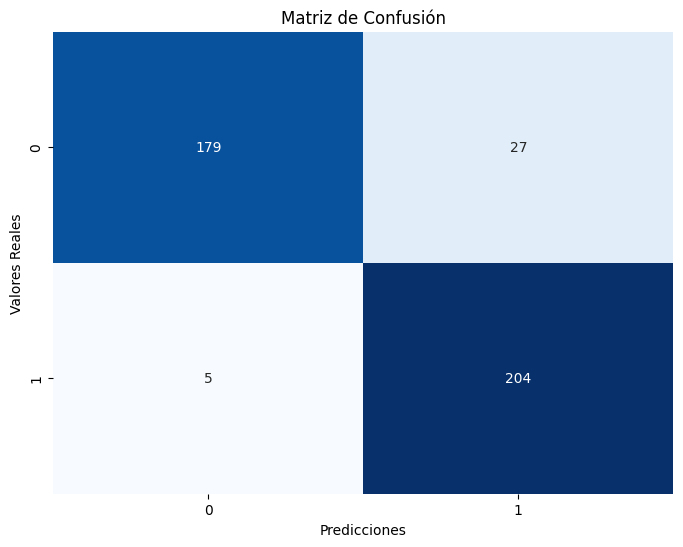

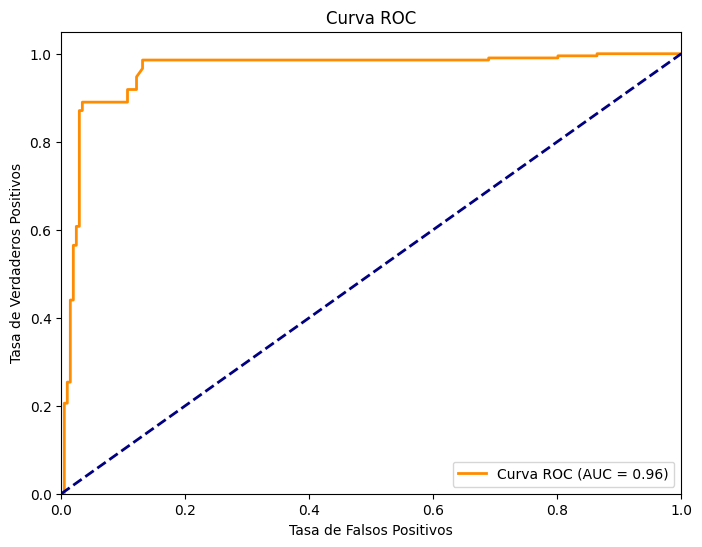

In [12]:
# Convertir las predicciones en etiquetas binarias (0 o 1) basadas en un umbral (por ejemplo, 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_binary)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [13]:


precision = precision_score(y_test, y_pred_binary)

print("Precision: {:.2f}".format(precision))

Precision: 0.88


In [52]:
# Create a DataFrame with new data to predict
new_data = pd.DataFrame({'Phi': [51.66], 'Dens': [6.02], 'Speed': [455.7], 'Temp': [188930]})

# Escalar los nuevos datos de entrada
new_data_scaled = scaler.transform(new_data)

# Realizar la predicción en los nuevos datos escalados
new_prediction_prob = model.predict(new_data_scaled)

# Establecer un umbral (por ejemplo, 0.5) para convertir la probabilidad en una etiqueta binaria
threshold = 0.7
new_prediction = (new_prediction_prob > threshold).astype(int)

# Imprimir la predicción
print("Predicción:", new_prediction[0])

1/1 [==============================] - 0s 19ms/step
Predicción: [1]


In [22]:

import socket
socket.gethostbyname(socket.gethostname())
print(socket)

<module 'socket' from '/usr/lib/python3.10/socket.py'>


In [ ]:
!pip install pyngrok

In [41]:
!pip install flask-cors


In [37]:
!ngrok authtoken '2WUh3anAF0ncAK9MYwbt7CuG1Bt_7PFmVUShLKE6xxPH5x9qz'

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [15]:
model.save('OracleDSCOVR.keras')

In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
from flask_cors import CORS

import numpy as np
import tensorflow as tf
app = Flask(__name__)

CORS(app)

# Cargar el modelo entrenado
model = tf.keras.models.load_model('OracleDSCOVR.keras')

run_with_ngrok(app)

@app.route('/')
def hello():
    return '¡THE ORACLE OF DSCOVR!'

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Obtener los parámetros de la solicitud POST
        phi = float(request.form['Phi'])
        dens = float(request.form['Dens'])
        speed = float(request.form['Speed'])
        temp = float(request.form['Temp'])

        # Crear un DataFrame con los parámetros
        data = pd.DataFrame({'Phi': [phi], 'Dens': [dens], 'Speed': [speed], 'Temp': [temp]})

        # Escalar los datos (si es necesario) usando el mismo scaler que utilizaste en el entrenamiento
        data_scaled = scaler.transform(data)

        # Realizar la predicción con el modelo
        prediction = model.predict(data_scaled)

        # Devolver la predicción como respuesta
        threshold = 0.7
        new_prediction = (new_prediction_prob > threshold).astype(int)
        return str(new_prediction[0])

    except Exception as e:

        return str(e)

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://5abf-35-221-17-90.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 20:55:03] "GET / HTTP/1.1" 200 -


1/1 [==============================] - 0s 43ms/step


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 20:55:25] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 17ms/step


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 20:56:16] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 18ms/step


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 20:56:28] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 21ms/step


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 20:57:26] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 18ms/step


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 20:57:30] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 30ms/step


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 20:57:51] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 17ms/step


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 20:58:19] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 18ms/step


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 20:58:50] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 20ms/step


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 20:59:06] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 17ms/step


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 21:00:09] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 18ms/step


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 21:00:40] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 18ms/step


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 21:01:48] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 19ms/step


INFO:werkzeug:127.0.0.1 - - [08/Oct/2023 21:01:55] "POST /predict HTTP/1.1" 200 -
